## ESMA 3016
## Edgar Acuna
### Lab12: Distribuciones hipergeometrica, geometrica y binomial Negativa

In [2]:
from scipy.stats import hypergeom,geom,nbinom
from scipy import special
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Distribucion Hipergeometrica

### $$P[X=i]=\frac {{m\choose i}{n\choose {k-i}}}{{m+n}\choose k},$$

#### para $i=max(0,k-n),.......min(k,m)$

Ejemplo1: De un lote de 10 articulos de los cuales 6 son de buenos y 4 danados se extraen al azar y Sin Reposicion
5 de ellos.

a)Cual es la probabilidad de que hayan  exactamente 3 danados entre los extraidos?

b)Cual es la probabilidad de que A LO Mas 2 sean 2 danados? 

c)Cual es la probabilidad de que haya al menos un danado entre los 5 extraidos?


 Sol: Sea X: Número de articulos danados (exito) en la muestra de 5. X es una hipergeometrica com M=10 (tamano de la poblacion), 
 n=4 (elementos del tipo I en la poblacion) y k=5 (tamano de la muestras)

In [3]:
# a)
hypergeom.pmf(3,10,4,5)

0.2380952380952378

In [4]:
#b
hypergeom.cdf(2,10,4,5)

0.73809523809523769

In [5]:
#c)
1-hypergeom.cdf(0,10,4,5)

0.97619047619047628

In [6]:
#Generando una muestra de 1000 valores de una hypergeometrica con N=10, n=4 y k=5 
a=hypergeom.rvs(10,4,5,size=1000)

In [7]:
#Hallando las frecuencias relativas de la muestra generada
unique_elements, counts_elements = np.unique(a, return_counts=True)
prob_sim=counts_elements/float(1000)
prob_sim

array([ 0.029,  0.239,  0.466,  0.24 ,  0.026])

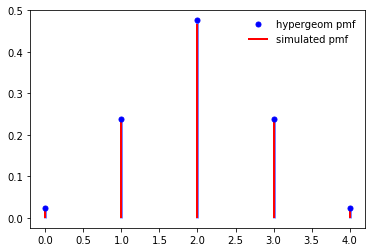

In [8]:
#Plot para comparar las probabilidades exactas de una hypergeometrica con las probabilidades simuladas
x=np.arange(0,5)
fig, ax = plt.subplots(1, 1)
ax.plot(x, hypergeom.pmf(x,10,4,5), 'bo', ms=5, label='hypergeom pmf')
ax.vlines(x, 0, hypergeom.pmf(x, 10,4,5), colors='b', lw=3, alpha=0.5)
ax.vlines(x, 0, prob_sim, colors='r', linestyles='-', lw=2,label='simulated pmf')
ax.legend(loc='best', frameon=False)

In [9]:
#Calculando la media de una hypergeometrica
x=np.arange(0,5)
mu=x*hypergeom.pmf(x,10,4,5)
mu.sum()

1.9999999999999984

###  Distribucion Geometrica
###  $$P[X=k]={(1-p)}^{k-1}p,$$
#### para $k=1,2,3,......$

Ejemplo 2: Distribucion Geometrica
    
Si las extracciones en el ejemplo anterior fueran con reemplazo

a) Cual es la probabilidad de que el primer articulo danado salga en la tercera extraccion?

b) Cual es la probabilidad de que el primer articulo danado salga a lo mas en  5 extracciones?

c) Cual es la probabilidad de que el primer articulo danado salga despues de 4 extracciones?

Solucion: Sea X: el numero de buenos extraidos hasta que salga el primer danado. X es una geometrica con p=.4

In [23]:
#a
p1=geom.pmf(3,.4)
print "%.5f" %  p1

0.14400


In [24]:
#b
p2=geom.cdf(5,.4)
round(p2,4)

0.9222

In [25]:
#c
p3=1-geom.cdf(4,.4)
print float("%.3f" % p3) 

0.13


In [13]:
#Generando una muestra de 1000 valores de una geometrica con p=.4 
a=geom.rvs(.4,size=1000)
#Hallando las frecuencias relativas de la muestra generada
unique_elements, counts_elements = np.unique(a, return_counts=True)
prob_sim=counts_elements/float(1000)
x=np.arange(1,11)
prob_sim

array([ 0.406,  0.22 ,  0.16 ,  0.084,  0.055,  0.032,  0.016,  0.012,
        0.003,  0.006,  0.002,  0.002,  0.001,  0.001])

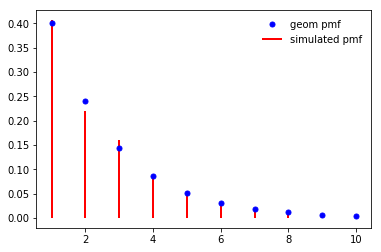

In [14]:
#Comparacion de la probabilidad teorica con la frecuencia relativa de 1000 valores simulados del 1 al 10
x=np.arange(1,11)
fig, ax=plt.subplots(1,1)
ax.plot(x, geom.pmf(x,.4), 'bo', ms=5, label='geom pmf')
ax.vlines(x, 0, geom.pmf(x,4), colors='b',lw=3,alpha=0.5)
ax.vlines(x, 0, prob_sim, colors='r', linestyles='-', lw=2,label='simulated pmf')
ax.legend(loc='best', frameon=False)

In [15]:
#valor esperado estimada de una geometrica (el valor exacto es 1/p=2.5)
x=np.arange(1,20)
mu=x*geom.pmf(x,.4)
mu.sum()

2.4986898765589776

###  Distribucion Binomial Negativa
###  $$P[X=k]={{k+r-1}\choose k}{(1-p)}^{k-1}p,$$
#### para $k=1,2,3,......$

Ejemplo 3: Distribucion Binomial Negativa (tambien llamada Pascal)

Bajo las mismas condiciones del ejemplo 2

a) Cual es la probabilidad de que salgan dos articulos buenos antes de salir el tercer articulo danado?

b) Cual es la probabilidad de que salgan a lo mas  3 buenos antes de que salga el tercer articulo danado?

c) Cual es la probabilidad de que el tercer articulo danado salga despues de que salgan 5 buenos?

Solucion: Sea X: el numero de buenos extraidos hasta que salga el tercer danado. X es una binomial negativa con r=3 y p=.4

In [16]:
#a
nbinom.pmf(2,3,.4)

0.13824000000000003

In [17]:
#b
nbinom.cdf(3,3,.4)

0.45568000000000008

In [18]:
#c
1-nbinom.cdf(5,3,.4)

0.3153945600000001

In [19]:
#Generando una muestra de 1000 valores de una binomial con p=.4 
a=nbinom.rvs(3,.4,size=1000)
#Hallando las frecuencias relativas de la muestra generada
unique_elements, counts_elements = np.unique(a, return_counts=True)
prob_sim=counts_elements/float(1000)
prob_sim

array([ 0.062,  0.109,  0.144,  0.157,  0.113,  0.105,  0.089,  0.062,
        0.057,  0.025,  0.021,  0.023,  0.009,  0.009,  0.004,  0.003,
        0.002,  0.001,  0.001,  0.003,  0.001])

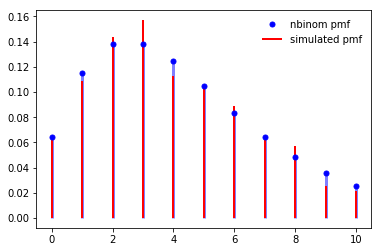

In [20]:
#Comparacion de la probabilidad teorica con la frecuencia relativa de 1000 valores simulados del 0 al 10
x=np.arange(0,11)
fig, ax=plt.subplots(1,1)
ax.plot(x, nbinom.pmf(x,3,.4), 'bo', ms=5, label='nbinom pmf')
ax.vlines(x,0,nbinom.pmf(x,3,.4), colors='b',lw=3,alpha=0.5)
ax.vlines(x, 0, prob_sim, colors='r', linestyles='-', lw=2,label='simulated pmf')
ax.legend(loc='best', frameon=False)

In [21]:
#valor esperado estimado de la Binomial Negativa con 3 danados y p=.4 (valor exacto es r*q/p=3*.6/.4=4.5)
x=np.arange(0,100)
mu=x*nbinom.pmf(x,3,.4)
mu.sum()

4.5